In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
def detect_outliers(coordinates, k_neighbors=4, subset_sizes=None):
    outlier_counts = []

    for subset_size in subset_sizes:

        if subset_size is not None and subset_size < len(coordinates):
            np.random.seed(42)
            subset_indices = np.random.choice(len(coordinates), subset_size, replace=False)
            coordinates_subset = coordinates[subset_indices]
        else:
            coordinates_subset = coordinates

        scaler = StandardScaler()
        data_standardized = scaler.fit_transform(coordinates_subset)

        knn_model = NearestNeighbors(n_neighbors=k_neighbors)
        knn_model.fit(data_standardized)

        distances, indices = knn_model.kneighbors(data_standardized)

        outlier_scores = np.mean(distances, axis=1)

        threshold = np.percentile(outlier_scores, 90)

        outliers = (outlier_scores > threshold).astype(int)

        # Count the number of outliers
        outlier_count = np.sum(outliers)
        outlier_counts.append(outlier_count)

        potential_outliers_indices = np.where(outliers == 1)[0]
        print(f"Potential Outliers Indices (Subset Size={subset_size}):", potential_outliers_indices)
        print("Potential Outliers Coordinates:")
        for i, coords in zip(potential_outliers_indices, coordinates_subset[potential_outliers_indices]):
            print(f"Node {i}: x = {coords[0]:.2f}, y = {coords[1]:.2f}")

        silhouette_avg = silhouette_score(data_standardized, outliers)
        print(f"Silhouette Score: {silhouette_avg}")

        db_index = davies_bouldin_score(data_standardized, outliers)
        print(f"Davies-Bouldin Index: {db_index}")

        plt.scatter(coordinates_subset[:, 0], coordinates_subset[:, 1], c=outliers, cmap='viridis')
        plt.title('Outlier Detection: Nodes and Outliers')
        plt.xlabel('X-coordinate')
        plt.ylabel('Y-coordinate')
        plt.show()

        print("\n" + "="*50 + "\n")

    return outlier_counts

In [ ]:
dataset_path = '.\dataset.txt'

In [ ]:
with open(dataset_path, 'r') as file:
    lines = file.readlines()

In [ ]:
data = []
for line in lines:
    values = list(map(float, line.split()))
    data.append(values[1:])  # Exclude the node number

In [ ]:
coordinates = np.array(data)

In [ ]:
subset_sizes = [15, 30, 45]

Potential Outliers Indices (Subset Size=15): [0 4]
Potential Outliers Coordinates:
Node 0: x = 0.50, y = 17.00
Node 4: x = 37.50, y = 19.00
Silhouette Score: 0.07658347083898809
Davies-Bouldin Index: 3.616834607797349


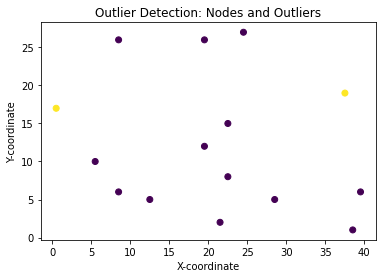



Potential Outliers Indices (Subset Size=30): [ 0  4 21]
Potential Outliers Coordinates:
Node 0: x = 0.50, y = 17.00
Node 4: x = 37.50, y = 19.00
Node 21: x = 1.50, y = 2.00
Silhouette Score: 0.10855484053631671
Davies-Bouldin Index: 4.099491622668832


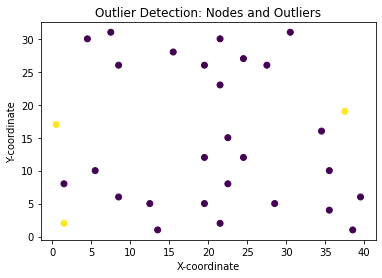



Potential Outliers Indices (Subset Size=45): [ 0  1  7 21 42]
Potential Outliers Coordinates:
Node 0: x = 0.50, y = 17.00
Node 1: x = 38.50, y = 1.00
Node 7: x = 28.50, y = 5.00
Node 21: x = 1.50, y = 2.00
Node 42: x = 40.50, y = 22.00
Silhouette Score: 0.12703168267881937
Davies-Bouldin Index: 3.093089740475385


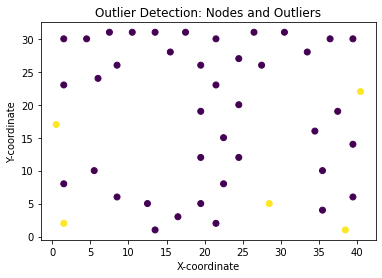

In [ ]:
outlier_counts = detect_outliers(coordinates, subset_sizes=subset_sizes)

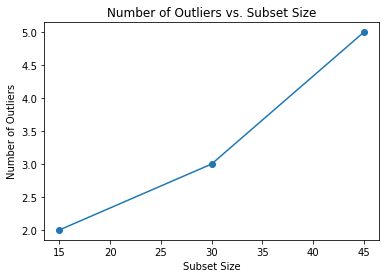

In [ ]:
plt.plot(subset_sizes, outlier_counts, marker='o')
plt.title('Number of Outliers vs. Subset Size')
plt.xlabel('Subset Size')
plt.ylabel('Number of Outliers')
plt.show()